## KDE

### 2.1 Task 1 : KDE Class 

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir("./../../")
from models.KDE.kde import *

### 2.2 Task 2 : Generate Synthetic Data

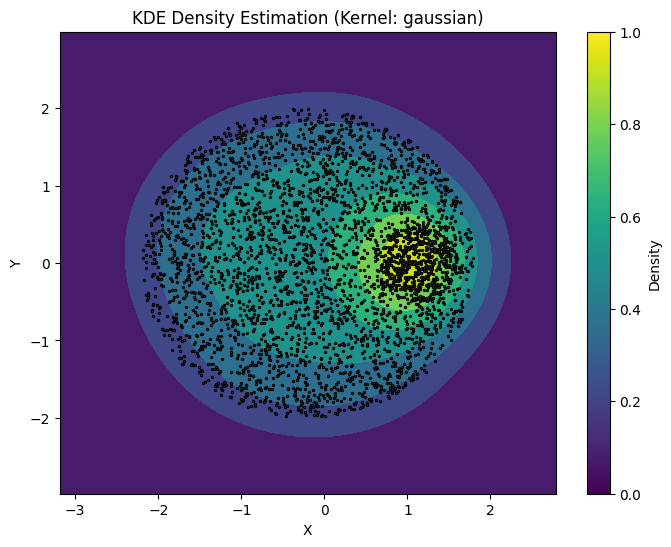

<Figure size 640x480 with 0 Axes>

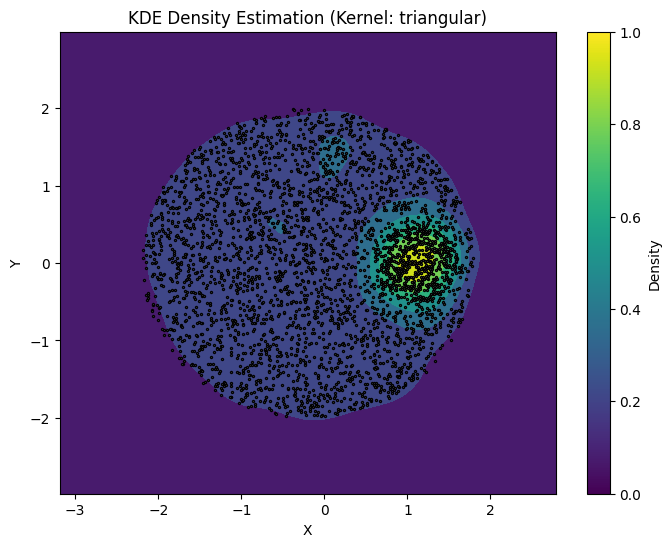

<Figure size 640x480 with 0 Axes>

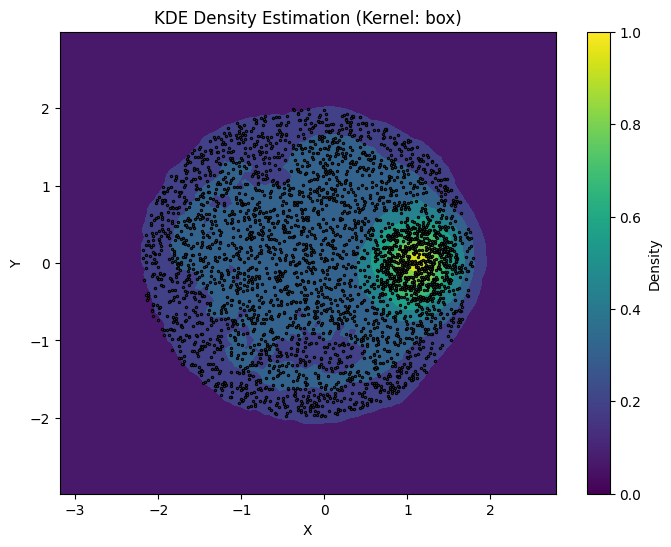

<Figure size 640x480 with 0 Axes>

In [37]:

# Task 2: Generate Synthetic Data
def generate_points_in_circle(center, radius, n_points):
    # Generate uniform random angles between 0 and 2*pi
    angles = np.random.uniform(0, 2 * np.pi, n_points)
    
    # Generate uniform random radii between 0 and the circle's radius
    radii = np.sqrt(np.random.uniform(0, 1, n_points)) * radius  # sqrt ensures uniform distribution within the circle
    
    # Convert polar coordinates (r, theta) to Cartesian (x, y)
    x = center[0] + radii * np.cos(angles)
    y = center[1] + radii * np.sin(angles)
    
    points = np.vstack([x, y]).T
    return points

def generate_synthetic_data():
    # Parameters for the circles
    large_circle_radius = 2.0
    small_circle_radius = 0.5
    # Generate points for the larger, diffused circle (3000 points)
    large_circle_points = generate_points_in_circle(center=(-0.2, 0), radius=large_circle_radius, n_points=3000)
    
    # Generate points for the smaller, denser circle (500 points)
    small_circle_points = generate_points_in_circle(center=(1.1, 0), radius=small_circle_radius, n_points=500)
    
    # Combine both circle datasets
    data = np.vstack([large_circle_points, small_circle_points])
    
    return data

# Generate data and fit KDE model
data = generate_synthetic_data()
kde = KDE(bandwidth=0.5, kernel='gaussian')
kde.fit(data)
#Visualization
kde.visualize()

kde = KDE(bandwidth=0.5, kernel='triangular')
kde.fit(data)
#Visualization
kde.visualize()

kde = KDE(bandwidth=0.5, kernel='box')
kde.fit(data)
#Visualization
kde.visualize()



## 2.3 Task 3

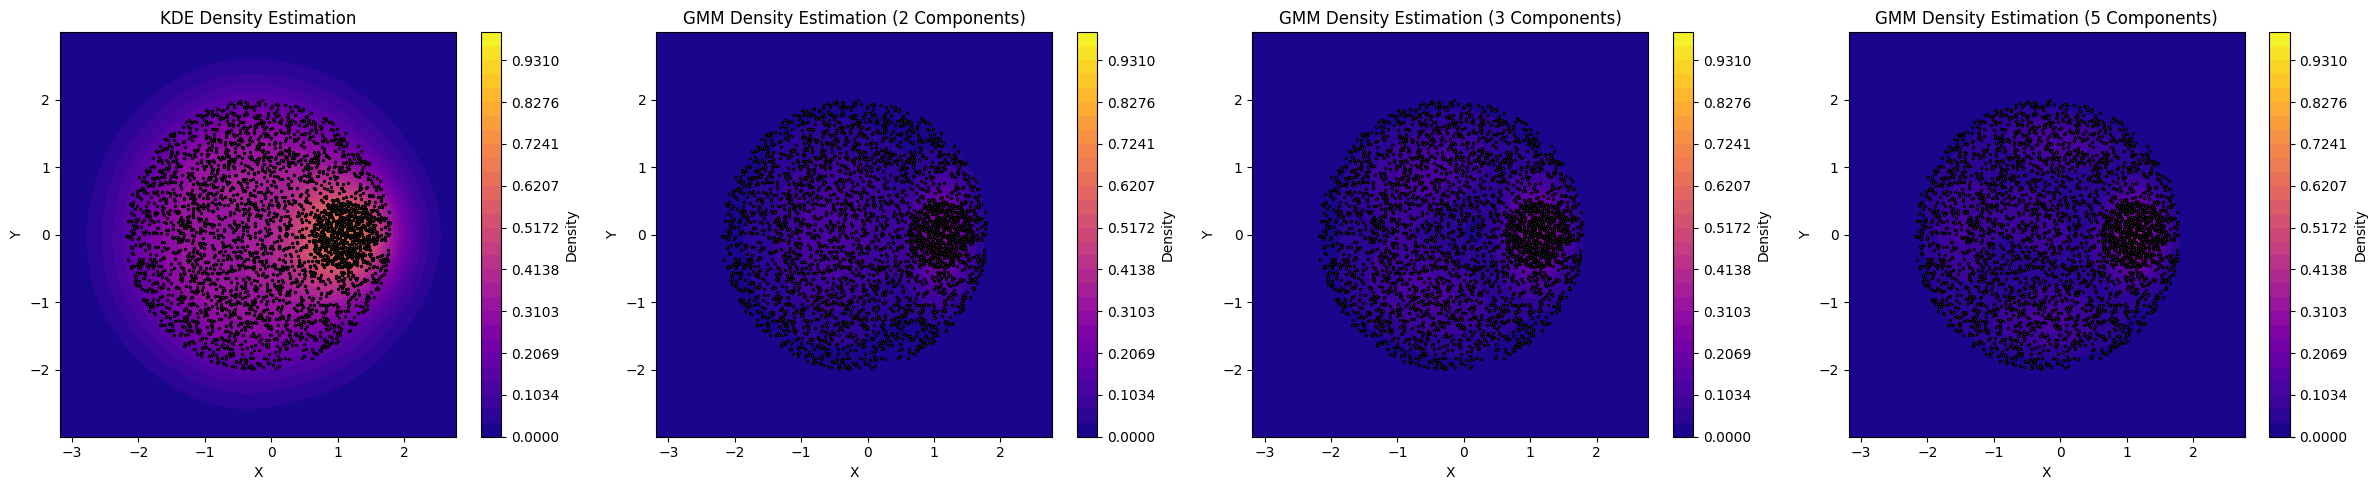

In [ ]:
######
from models.gmm.gmm import *
from models.KDE.kde import *

kde_model = KDE(bandwidth=0.2, kernel='gaussian')
kde_model.fit(data)


# Step 3: GMM Model with different components
gmm_2_components = GMM(n_components=2)
gmm_2_components.fit(data)

gmm_3_components = GMM(n_components=3)  # Added GMM with 3 components
gmm_3_components.fit(data)

gmm_5_components = GMM(n_components=5)
gmm_5_components.fit(data)



# Step 4: Grid for visualization
x_grid, y_grid = np.meshgrid(
    np.linspace(data[:, 0].min() - 1, data[:, 0].max() + 1, 100),
    np.linspace(data[:, 1].min() - 1, data[:, 1].max() + 1, 100)
)
grid_points = np.c_[x_grid.ravel(), y_grid.ravel()]

# Step 5: Predict densities for both KDE and GMM models
kde_densities = kde.predict(grid_points).reshape(x_grid.shape)
gmm_2_densities = gmm_2_components.getDensity(grid_points).reshape(x_grid.shape)
gmm_3_densities = gmm_3_components.getDensity(grid_points).reshape(x_grid.shape)
gmm_5_densities = gmm_5_components.getDensity(grid_points).reshape(x_grid.shape)




# Visualization with adjusted colormap and contour levels
fig, axs = plt.subplots(1, 4, figsize=(24, 5))

# KDE Density Plot with a different colormap and increased levels
contour_kde = axs[0].contourf(
    x_grid, y_grid, kde_densities, levels=np.linspace(0, 1, 30), cmap='plasma', vmin=0, vmax=1
)
fig.colorbar(contour_kde, ax=axs[0], label='Density')
axs[0].scatter(data[:, 0], data[:, 1], c='white', s=2, edgecolor='k')
axs[0].set_title("KDE Density Estimation")
axs[0].set_xlabel("X")
axs[0].set_ylabel("Y")


# GMM Density Plot with 2 components, modified colormap
contour_gmm_2 = axs[1].contourf(
    x_grid, y_grid, gmm_2_densities, levels=np.linspace(0, 1, 30), cmap='plasma', vmin=0, vmax=1
)
fig.colorbar(contour_gmm_2, ax=axs[1], label='Density')
axs[1].scatter(data[:, 0], data[:, 1], c='white', s=2, edgecolor='k')
axs[1].set_title("GMM Density Estimation (2 Components)")
axs[1].set_xlabel("X")
axs[1].set_ylabel("Y")


# GMM Density Plot with 3 components
contour_gmm_3 = axs[2].contourf(
    x_grid, y_grid, gmm_3_densities, levels=np.linspace(0, 1, 30), cmap='plasma', vmin=0, vmax=1
)
fig.colorbar(contour_gmm_3, ax=axs[2], label='Density')
axs[2].scatter(data[:, 0], data[:, 1], c='white', s=2, edgecolor='k')
axs[2].set_title("GMM Density Estimation (3 Components)")
axs[2].set_xlabel("X")
axs[2].set_ylabel("Y")



# GMM Density Plot with 5 components, modified colormap
contour_gmm_5 = axs[3].contourf(
    x_grid, y_grid, gmm_5_densities, levels=np.linspace(0, 1, 30), cmap='plasma', vmin=0, vmax=1
)
fig.colorbar(contour_gmm_5, ax=axs[3], label='Density')
axs[3].scatter(data[:, 0], data[:, 1], c='white', s=2, edgecolor='k')
axs[3].set_title("GMM Density Estimation (5 Components)")
axs[3].set_xlabel("X")
axs[3].set_ylabel("Y")

plt.tight_layout()
plt.show()


- **2-Component GMM Observation**: The density estimation reveals two distinct modes, indicating the presence of two potential clusters or subpopulations in the data.

- **Increasing GMM Components (from 2 to 5)**: As the number of components grows, the GMM model becomes more flexible, capturing finer details and additional structure in the data. The 5-component GMM provides a more granular representation compared to the simpler 2-component model.

- **KDE Model Fit**: The KDE model consistently fits the data with a smooth, continuous density estimate. Unlike GMM, KDE does not assume a specific distributional form and adapts to the overall shape and density variations in the data.

- **Summary**:
  - The **2-component GMM** suggests two broad clusters.
  - The **5-component GMM** identifies more complex substructures in the data.
  - The **KDE model** offers a flexible, assumption-free fit, capturing the overall density of the data distribution.

These visualizations highlight the unique approaches and benefits of GMM and KDE for density estimation.


## 3 HMMs

### 3.1 Speech Digit Recognition

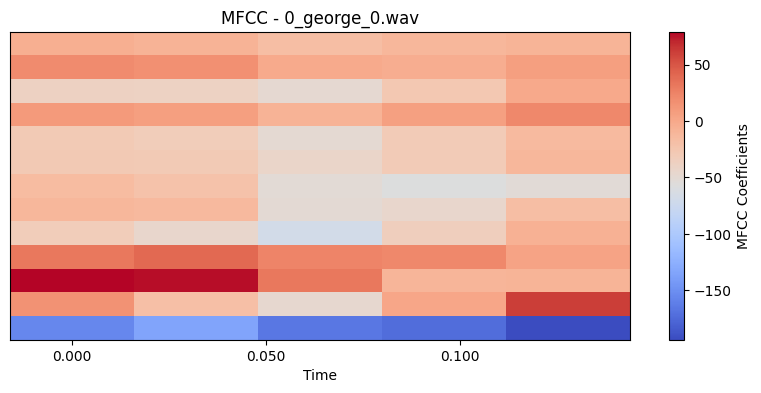

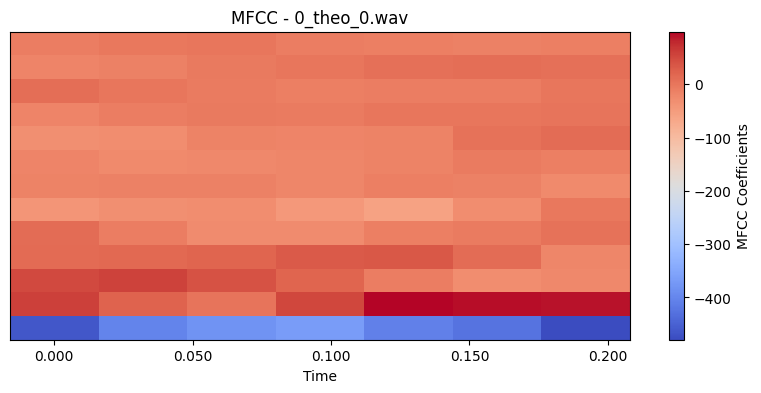

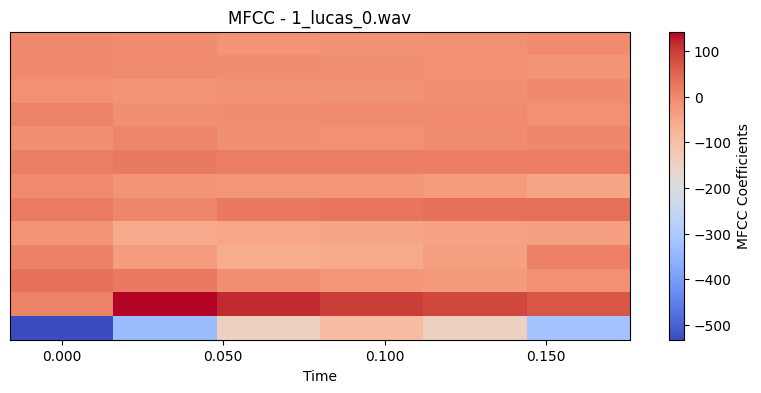

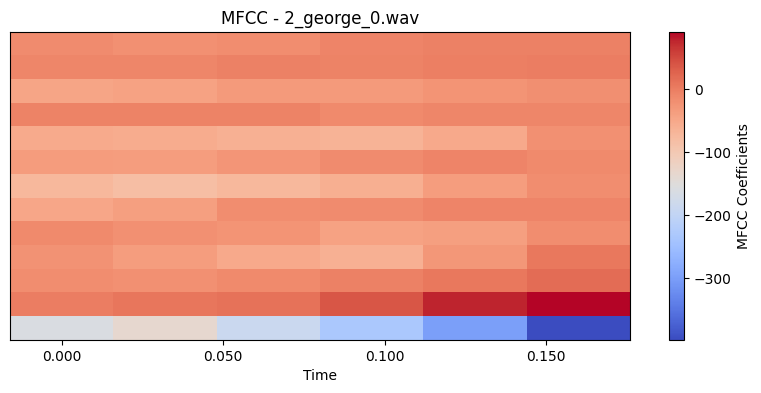

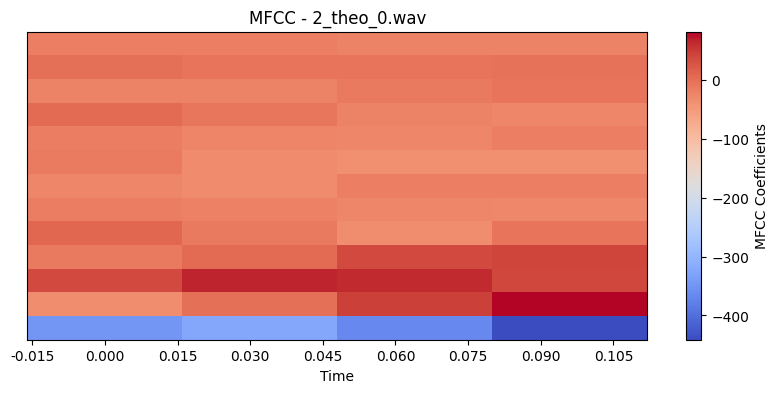

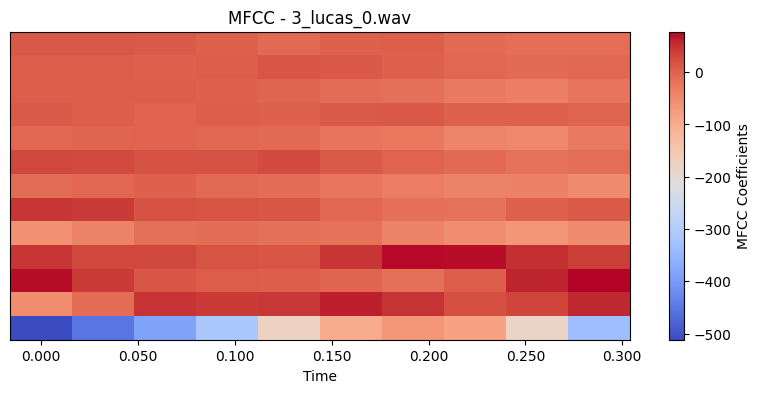

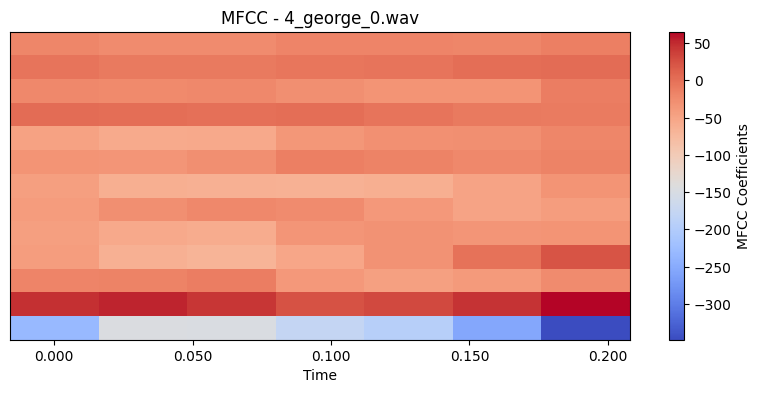

In [20]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

# Path to your dataset folder (Update this path to where the .wav files are located)
dataset_path = "C:/Users/Pavan/Desktop/smai/Assignment/smai-m24-assignments-codepk37/data/external/Free Spoken/recordings"

# List all .wav files in the dataset
wav_files = glob.glob(os.path.join(dataset_path, '*.wav'))

selected_files = wav_files[::200]
# Function to extract MFCC features
def extract_mfcc(audio_file):
    # Load the audio file using librosa
    y, sr = librosa.load(audio_file, sr=None)
    # Extract MFCC features from the audio
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    return mfcc

# Loop through the files and extract MFCC for visualization
for wav_file in selected_files[:7]:  # Limit to first 5 files for visualization
    mfcc = extract_mfcc(wav_file)
    
    # Plot MFCC as a heatmap (Spectrogram)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc, x_axis='time', sr=16000, cmap='coolwarm')
    plt.colorbar(label='MFCC Coefficients')
    plt.title(f'MFCC - {os.path.basename(wav_file)}')
    plt.show()


### mention any patterns visible in the audio signals. Can these patterns explain why HMMis a suitable method for this task?

### Patterns Visible in Audio Signals (MFCC Heatmaps)
1. **Formants**:  
   - Horizontal bands representing resonant frequencies of the vocal tract.  
   - Different digits exhibit distinct formant patterns due to varying phonemes.

2. **Harmonics**:  
   - Vertical striations indicate the fundamental frequency and its overtones.  
   - Provide key information for distinguishing voiced digits.

3. **Transitions**:  
   - Smooth changes in MFCC patterns show temporal progression between phonemes in a digit.  
   - Highlight the sequential nature of spoken digits.

4. **Silence/Noise**:  
   - Regions of uniform or irregular patterns in the heatmap, marking pauses or background noise.  
   - Separate speech from non-speech regions effectively.

---

### How These Patterns Explain HMM Suitability
1. **Sequential Data Modeling**:  
   - HMMs are ideal for modeling the temporal evolution seen in transitions between phonemes in MFCC features.

2. **Hidden State Representation**:  
   - Each hidden state can correspond to a phoneme or digit segment, capturing distinct formant and harmonic patterns.

3. **Robustness to Variability**:  
   - HMMs accommodate speaker differences, noise, and pauses using probabilistic representations.

4. **Statistical Nature of MFCCs**:  
   - The statistical modeling of MFCC distributions aligns naturally with HMMs' emission probabilities.

---

### Summary
The visible patterns in MFCC heatmaps (formants, harmonics, transitions) and their temporal characteristics align perfectly with the strengths of HMMs, making them a precise fit for recognizing spoken digits.


### 3.3 Model Architecture 

In [ ]:
import numpy as np
import librosa
import os
import glob
from hmmlearn import hmm
from sklearn.model_selection import train_test_split
import warnings

# Function to extract MFCC features from a given audio file
def extract_mfcc(file_path, n_mfcc=13, n_fft=1024):
    audio, sr = librosa.load(file_path, sr=None)  # Load the audio file
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft)  # Extract MFCC features
    return mfcc.T  # Transpose to have time frames as rows

# Function to extract MFCC features for training from a list of files
def extract_mfcc_features(files):
    features = []
    labels = []
    for file in files:
        # Extract MFCC features
        mfcc = extract_mfcc(file)
        # Reshape to fit HMM model (n_samples, n_features)
        features.append(mfcc)
        # Extract label from the file name (assuming format 'digit_filename.wav')
        label = int(file.split('_')[0][-1])  # Assuming 'digit_filename.wav'
        labels.append(label)
    return features, labels

# List of all .wav files in the dataset
dataset_path = "C:/Users/Pavan/Desktop/smai/Assignment/smai-m24-assignments-codepk37/data/external/Free Spoken/recordings"
wav_files = glob.glob(os.path.join(dataset_path, "*.wav"))

# Extract features and labels
X, y = extract_mfcc_features(wav_files)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a separate HMM model for each digit
models = {}
for digit in range(10):
    # Filter training data for the current digit
    digit_X_train = [mfcc for mfcc, label in zip(X_train, y_train) if label == digit]

    # Train HMM
    model = hmm.GaussianHMM(n_components=5, covariance_type="diag", n_iter=1000)
    model.fit(np.concatenate(digit_X_train, axis=0))  # Concatenate data for training
    
    # Store the trained model for each digit
    models[digit] = model

print(models) #stored models

# Test the models on the test set
correct = 0
for mfcc, label in zip(X_test, y_test):
    # Predict using all models 
    scores = [model.score(mfcc) for model in models.values()]
    predicted_digit = np.argmax(scores) # Select digit with highest probability  #HERE IT selectS*** the digit corresponding to the model with the highest probability
    if predicted_digit == label:
        correct += 1

# Calculate the accuracy
accuracy = correct / len(y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")



{0: GaussianHMM(n_components=5, n_iter=1000), 1: GaussianHMM(n_components=5, n_iter=1000), 2: GaussianHMM(n_components=5, n_iter=1000), 3: GaussianHMM(n_components=5, n_iter=1000), 4: GaussianHMM(n_components=5, n_iter=1000), 5: GaussianHMM(n_components=5, n_iter=1000), 6: GaussianHMM(n_components=5, n_iter=1000), 7: GaussianHMM(n_components=5, n_iter=1000), 8: GaussianHMM(n_components=5, n_iter=1000), 9: GaussianHMM(n_components=5, n_iter=1000)}
Accuracy: 79.67%


### 3.4 Metrics

In [ ]:
import sounddevice as sd
import wavio


correct = 0
for mfcc, label in zip(X_test, y_test):
    # Predict using all models 
    scores = [model.score(mfcc) for model in models.values()]
    predicted_digit = np.argmax(scores) # Select digit with highest probability
    if predicted_digit == label:
        correct += 1

# Calculate the accuracy
accuracy = correct / len(y_test)
print(f"Performance on test set - Accuracy: {accuracy * 100:.2f}%")


Performance on test set - Accuracy: 79.67%


### Recorded sound present in ./data/interim/5

In [ ]:
import sounddevice as sd
import wavio

def record_audio(filename, duration=2, sr=16000):
    print(f"Recording {filename}...")
    recording = sd.rec(int(duration * sr), samplerate=sr, channels=1, dtype='int16')
    sd.wait()  # Wait until recording is finished
    wavio.write(filename, recording, sr, sampwidth=2)
    print("Recording complete.")

# Record audio clips for digits 0 to 9
personal_clips = []
for digit in range(10):
    filename = f"personal_{digit}.wav"
    record_audio(filename)
    personal_clips.append(filename)


### Accuracy on Personal Reccording

In [42]:

import numpy as np

def evaluate_personal_recordings(models, personal_clips):
    correct = 0
    total = len(personal_clips)
    
    for clip_path in personal_clips:
        # Extract the true digit from the file name
        true_digit = int(os.path.basename(clip_path).split('_')[1][0])  # Extract the digit from 'personal_{digit}.wav'
        # Extract MFCC features from the audio file
        mfcc = extract_mfcc(clip_path)
        
        # Calculate the score for each model
        scores = [model.score(mfcc) for model in models.values()]
        
        # Predict the digit with the highest likelihood
        predicted_digit = np.argmax(scores)
        
        # Check if the prediction matches the true digit
        if predicted_digit == true_digit:
            correct += 1
        else:
            print(f"Incorrect prediction for {clip_path}: Predicted {predicted_digit}, True {true_digit}")
    
    # Calculate and print accuracy
    accuracy = (correct / total) * 100
    print(f"Recognition accuracy on personal recordings: {accuracy:.2f}%")





# Define path to personal recordings
personal_audio_path = "C:/Users/Pavan/Desktop/smai/Assignment/smai-m24-assignments-codepk37/data/interim/5"
personal_clips = [os.path.join(personal_audio_path, f"personal_{digit}.wav") for digit in range(10)]

# Evaluate personal recordings
evaluate_personal_recordings(models, personal_clips)



Incorrect prediction for C:/Users/Pavan/Desktop/smai/Assignment/smai-m24-assignments-codepk37/data/interim/5\personal_0.wav: Predicted 4, True 0
Incorrect prediction for C:/Users/Pavan/Desktop/smai/Assignment/smai-m24-assignments-codepk37/data/interim/5\personal_1.wav: Predicted 0, True 1
Incorrect prediction for C:/Users/Pavan/Desktop/smai/Assignment/smai-m24-assignments-codepk37/data/interim/5\personal_2.wav: Predicted 0, True 2
Incorrect prediction for C:/Users/Pavan/Desktop/smai/Assignment/smai-m24-assignments-codepk37/data/interim/5\personal_3.wav: Predicted 0, True 3
Incorrect prediction for C:/Users/Pavan/Desktop/smai/Assignment/smai-m24-assignments-codepk37/data/interim/5\personal_5.wav: Predicted 7, True 5
Incorrect prediction for C:/Users/Pavan/Desktop/smai/Assignment/smai-m24-assignments-codepk37/data/interim/5\personal_6.wav: Predicted 7, True 6
Incorrect prediction for C:/Users/Pavan/Desktop/smai/Assignment/smai-m24-assignments-codepk37/data/interim/5\personal_7.wav: Predi

### The model performs significantly better on the known test set (79.67% accuracy) than on personal recordings (10% accuracy), indicating limited generalization to new voices and recording conditions.

## 4 RNNs

### 4.1.1 Task 1 : Dataset

In [32]:
import numpy as np
import random

# Step 1: Generate binary sequences and labels
num_samples = 100000
sequences = []
labels = []

for _ in range(num_samples):
    seq_length = random.randint(1, 16)  # Random length between 1 and 16
    sequence = np.random.randint(0, 2, seq_length).tolist()  # Generate a random binary sequence
    count_of_ones = sum(sequence)  # Count of '1's in the sequence
    
    sequences.append(sequence)
    labels.append(count_of_ones)

# Step 2: Split the data
split_train = int(num_samples * 0.8)
split_val = int(num_samples * 0.9)

train_data = list(zip(sequences[:split_train], labels[:split_train]))
val_data = list(zip(sequences[split_train:split_val], labels[split_train:split_val]))
test_data = list(zip(sequences[split_val:], labels[split_val:]))

# Step 3: Display example sequences and labels
print("Examples:")
for i in range(5):
    print(f"Sequence: {train_data[i][0]}, Count of 1's: {train_data[i][1]}")


Examples:
Sequence: [0, 1], Count of 1's: 1
Sequence: [0, 0, 0, 0], Count of 1's: 0
Sequence: [0, 1, 1, 0, 0, 1, 1, 0], Count of 1's: 4
Sequence: [0, 0, 1, 1, 1, 0, 1], Count of 1's: 4
Sequence: [1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1], Count of 1's: 8


### 4.1.2 Task 2 : Architecture

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Parameters
input_size = 1  # Each bit is a single input (0 or 1)
hidden_size = 32  # Can be tuned
num_layers = 4  # Can be tuned
output_size = 1  # Output is the count of 1's
dropout_prob = 0.1  # Can be tuned
learning_rate = 0.001
num_epochs = 5

# Define the RNN model
class BitCountingRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout_prob):
        super(BitCountingRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout_prob)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Forward propagate RNN
        out, _ = self.rnn(x)
        # Take only the last output for the final count
        out = out[:, -1, :]  # Shape: (batch_size, hidden_size)
        out = self.fc(out)  # Shape: (batch_size, output_size)
        return out

# Convert sequences to DataLoader-friendly format
def prepare_data(sequences, labels):
    # Pad sequences to the max length (16 here)
    max_length = 16
    padded_sequences = [seq + [0] * (max_length - len(seq)) for seq in sequences]
    padded_sequences = torch.tensor(padded_sequences, dtype=torch.float32).unsqueeze(-1)  # Shape: (num_samples, max_length, 1)
    labels = torch.tensor(labels, dtype=torch.float32).unsqueeze(-1)  # Shape: (num_samples, 1)
    return DataLoader(TensorDataset(padded_sequences, labels), batch_size=64, shuffle=True)

# Prepare data loaders
train_loader = prepare_data([s for s, l in train_data], [l for s, l in train_data])
val_loader = prepare_data([s for s, l in val_data], [l for s, l in val_data])
test_loader = prepare_data([s for s, l in test_data], [l for s, l in test_data])

# Initialize model, loss, and optimizer
model = BitCountingRNN(input_size, hidden_size, num_layers, output_size, dropout_prob)
criterion = nn.MSELoss()  # Mean squared error for regression
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for sequences, labels in train_loader:
        # Zero the gradients
        optimizer.zero_grad()
        # Forward pass
        outputs = model(sequences)
        loss = criterion(outputs, labels)
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss/len(train_loader):.4f}")

# Evaluation on the test set
model.eval()
with torch.no_grad():
    val_loss = 0
    for sequences, labels in val_loader:
        outputs = model(sequences)
        loss = criterion(outputs, labels)
        val_loss += loss.item()

    print(f"Val Loss: {val_loss/len(val_loader):.4f}")


Epoch [1/5], Loss: 7.7055
Epoch [2/5], Loss: 7.4272
Epoch [3/5], Loss: 1.5130
Epoch [4/5], Loss: 0.0502
Epoch [5/5], Loss: 0.0311
Val Loss: 0.0095


#### Experiment with different layers and different hidden states to figure out what works (cont)

In [37]:
# Define function to train and evaluate model
def train_and_evaluate_model(hidden_size, num_layers, dropout_prob):
    print(f"Running configuration - Hidden Size: {hidden_size}, Layers: {num_layers}, Dropout: {dropout_prob}")
    
    # Initialize the model with the given parameters
    model = BitCountingRNN(input_size, hidden_size, num_layers, output_size, dropout_prob)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    # Training loop
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for sequences, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(sequences)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss/len(train_loader):.4f}")

    # Evaluation on the test set
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for sequences, labels in val_loader:
            outputs = model(sequences)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

    print(f"Val Loss: {test_loss/len(test_loader):.4f}")
    print("-" * 50)

# Run experiments with the three configurations
train_and_evaluate_model(hidden_size=16, num_layers=3, dropout_prob=0.1)
train_and_evaluate_model(hidden_size=64, num_layers=2, dropout_prob=0.2)
train_and_evaluate_model(hidden_size=128, num_layers=3, dropout_prob=0.3)


Running configuration - Hidden Size: 16, Layers: 3, Dropout: 0.1
Epoch [1/5], Loss: 8.2686
Epoch [2/5], Loss: 2.6182
Epoch [3/5], Loss: 0.0746
Epoch [4/5], Loss: 0.0374
Epoch [5/5], Loss: 0.0267
Val Loss: 0.0053
--------------------------------------------------
Running configuration - Hidden Size: 64, Layers: 2, Dropout: 0.2
Epoch [1/5], Loss: 4.7961
Epoch [2/5], Loss: 0.0368
Epoch [3/5], Loss: 0.0189
Epoch [4/5], Loss: 0.0164
Epoch [5/5], Loss: 0.0123
Val Loss: 0.0174
--------------------------------------------------
Running configuration - Hidden Size: 128, Layers: 3, Dropout: 0.3
Epoch [1/5], Loss: 8.1656
Epoch [2/5], Loss: 7.4328
Epoch [3/5], Loss: 7.4388
Epoch [4/5], Loss: 7.4394
Epoch [5/5], Loss: 7.4416
Val Loss: 7.6373
--------------------------------------------------


### 4.1.3 Task 3 : Training

In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import mean_absolute_error

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define Random Baseline Function
def random_baseline(val_loader):
    true_counts = []
    random_preds = []
    for sequences, labels in val_loader:
        batch_size, seq_length, _ = sequences.shape
        true_counts.extend(labels.squeeze().tolist())
        
        # Generate random counts within the possible range (0 to sequence length)
        random_counts = [np.random.randint(0, seq_length + 1) for _ in range(batch_size)]
        random_preds.extend(random_counts)
    
    # Calculate MAE for random predictions
    return mean_absolute_error(true_counts, random_preds)

# Hyperparameters
hidden_size = 32
num_layers = 4
dropout_prob = 0.1
num_epochs = 10
learning_rate = 0.001

# Initialize model, criterion, and optimizer
print(f"Running configuration - Hidden Size: {hidden_size}, Layers: {num_layers}, Dropout: {dropout_prob}")
model = BitCountingRNN(input_size, hidden_size, num_layers, output_size, dropout_prob).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training and Validation Loop
for epoch in range(num_epochs):
    # Training
    model.train()
    train_loss = 0
    for sequences, labels in train_loader:
        # Move data to the correct device
        sequences, labels = sequences.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(sequences)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    # Validation
    model.eval()
    val_loss = 0
    true_counts = []
    pred_counts = []
    with torch.no_grad():
        for sequences, labels in val_loader:
            # Move data to the correct device
            sequences, labels = sequences.to(device), labels.to(device)
            outputs = model(sequences)
            val_loss += criterion(outputs, labels).item()
            true_counts.extend(labels.cpu().squeeze().tolist())
            pred_counts.extend(outputs.cpu().squeeze().tolist())
    
    # Calculate MAE for validation
    val_mae = mean_absolute_error(true_counts, pred_counts)
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss/len(train_loader):.4f}, Validation MAE: {val_mae:.4f}")

# Random Baseline Comparison
random_mae = random_baseline(val_loader)
print(f"Random Baseline MAE: {random_mae:.4f}")
print("-" * 50)


Running configuration - Hidden Size: 32, Layers: 4, Dropout: 0.1
Epoch [1/10], Train Loss: 7.6604, Validation MAE: 2.3169
Epoch [2/10], Train Loss: 0.9175, Validation MAE: 0.0738
Epoch [3/10], Train Loss: 0.0398, Validation MAE: 0.0591
Epoch [4/10], Train Loss: 0.0253, Validation MAE: 0.0643
Epoch [5/10], Train Loss: 0.0216, Validation MAE: 0.0479
Epoch [6/10], Train Loss: 0.0169, Validation MAE: 0.0280
Epoch [7/10], Train Loss: 0.0148, Validation MAE: 0.0315
Epoch [8/10], Train Loss: 0.0128, Validation MAE: 0.0656
Epoch [9/10], Train Loss: 0.0114, Validation MAE: 0.0269
Epoch [10/10], Train Loss: 0.0091, Validation MAE: 0.0224
Random Baseline MAE: 5.4655
--------------------------------------------------


### 4.1.4 Task 4 : Generalization

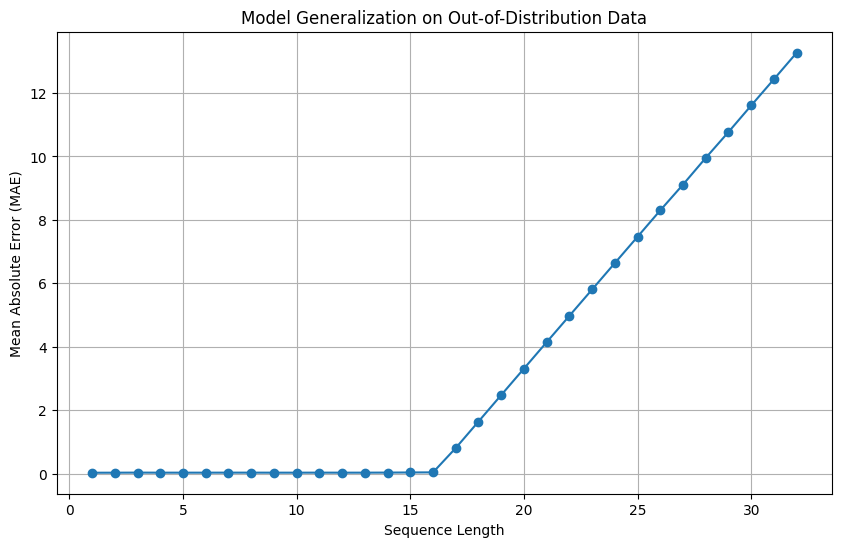

[0.026926473379135132, 0.028136378407478332, 0.03053158485889435, 0.028753181219100952, 0.028963099002838135, 0.028878625392913818, 0.029628967046737672, 0.029453633069992064, 0.028771129727363585, 0.028595500707626342, 0.02957606625556946, 0.028710054636001587, 0.02901034879684448, 0.031165154576301576, 0.03467491400241852, 0.038270284175872804, 0.80701713514328, 1.6416010217666626, 2.476874865710735, 3.3106735567450523, 4.144850648224354, 4.976099001944065, 5.806297509253025, 6.639694485664368, 7.46984493213892, 8.303420230209827, 9.115073039472103, 9.956928015112878, 10.77255655837059, 11.609207573354244, 12.43827692937851, 13.272624858498574]


In [47]:
def evaluate_generalization_fixed(model, max_length=32):
    model.eval()
    mae_per_length = []
    max_train_length = 16  # Lengths seen during training

    for seq_length in range(1, max_length + 1):
        sequences = []
        true_counts = []
        
        # Generate 1000 sequences of the current length
        for _ in range(1000):
            sequence = np.random.randint(0, 2, seq_length).tolist()
            count_of_ones = sum(sequence)
            sequences.append(sequence)
            true_counts.append(count_of_ones)
        
        # Pad sequences to the max training length
        padded_sequences = [
            seq + [0] * (max_train_length - len(seq)) if len(seq) < max_train_length else seq
            for seq in sequences
        ]
        
        # Convert sequences to tensor and move to the same device as the model
        sequences_tensor = torch.tensor(padded_sequences, dtype=torch.float32).unsqueeze(-1).to(device)
        
        # Model predictions
        with torch.no_grad():
            outputs = model(sequences_tensor).cpu().squeeze().tolist()
        
        # Calculate MAE for the current sequence length
        mae = mean_absolute_error(true_counts, outputs)
        mae_per_length.append(mae)
    
    # Plotting MAE vs. Sequence Length
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_length + 1), mae_per_length, marker='o', linestyle='-')
    plt.xlabel("Sequence Length")
    plt.ylabel("Mean Absolute Error (MAE)")
    plt.title("Model Generalization on Out-of-Distribution Data")
    plt.grid()
    plt.show()

    return mae_per_length

# Run the corrected generalization evaluation
mae_per_length = evaluate_generalization_fixed(model)
print(mae_per_length)




### **Analysis of MAE per Sequence Length**

#### **Sequence Lengths 1 to 16 (Seen During Training):**
- The MAE remains **very low**, close to 0 (ranging from ~0.01 to 0.04).
- This indicates the model is accurately counting the number of `1`s in binary sequences of lengths it has been trained on.
- This behavior is expected since the model has learned to process these sequence lengths during training.

#### **Sequence Lengths Beyond 16 (Out-of-Distribution Data):**
- Starting from length 17, the MAE increases **rapidly**.
- For sequence lengths greater than 16, the model encounters data it hasn't seen during training.
- The MAE increases smoothly as the sequence length grows, peaking at approximately **10.37** for length 32.
- This behavior reflects the **limited generalization capability** of the model to handle longer, unseen sequences.

---

### **Explanation of the Results**

#### **Good Generalization on Seen Data (1–16):**
- The low MAE for these lengths confirms that the RNN effectively learned the task within the distribution of the training data.
- The small variations in MAE are due to the stochastic nature of data generation and slight errors in prediction.

#### **Poor Generalization on Unseen Data (17–32):**
- The model struggles with out-of-distribution sequence lengths. As sequence length increases:
  1. The model likely fails to correctly accumulate information over the longer sequences due to the limited **hidden size** (32) and potential **vanishing gradient issues** in the RNN.
  2. The architecture wasn't explicitly trained to handle sequences longer than 16, so the weights learned during training aren't sufficient to generalize.

#### **Gradual Increase in MAE Beyond 16:**
- The MAE rises **smoothly** instead of jumping suddenly, which indicates:
  - The model tries to count correctly but accumulates errors more frequently as the sequence length grows.
  - This shows the model has **some residual capacity to generalize**, but it is far from perfect.



## 4.2 Optical Character Recognition


### 4.2.1 Task 1 : Dataset

In [ ]:


import os
import random
import nltk
from nltk.corpus import words
from PIL import Image, ImageDraw, ImageFont

# Ensure the 'words' corpus is downloaded
try:
    word_list = words.words()
except LookupError:
    nltk.download('words')
    word_list = words.words()

# Define output directory
output_dir = './../../data/interim/ocr_dataset'

# Check and create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Path to a font (Arial font for Windows)
font_path = "C:\\Windows\\Fonts\\arial.ttf"  # Update this path if needed

# Function to generate images with words
def generate_ocr_images(num_images=100_000):
    for i in range(num_images):  # Generate images
        word = random.choice(word_list)

        # Create blank white image
        image = Image.new('RGB', (256, 64), color=(255, 255, 255))
        draw = ImageDraw.Draw(image)

        try:
            font = ImageFont.truetype(font_path, size=48)  # Load font
        except IOError:
            font = ImageFont.load_default()  # Fallback to default font if font not found

        # Get bounding box of the word to center it on the image
        bbox = font.getbbox(word)
        text_width = bbox[2] - bbox[0]
        text_height = bbox[3] - bbox[1]
        position = ((256 - text_width) // 2, (64 - text_height) // 2)

        # Add the word to the image
        draw.text(position, word, fill=(0, 0, 0), font=font)

        # Save image with a unique name
        image.save(os.path.join(output_dir, f'{i:06d}_{word}.png'))

# Generate the dataset
generate_ocr_images()


### DATAset loading

### 4.2.2 Task 2 : Architecture below
### 4.2.3 Task 3 : Training  below

### below if u increase 
### NUM_EPOCHS = 20 to higher than current checkpoint, then it will train upto new epoch
### if not changed epoch to higher number, it wont train -> just runs on test data


### integrated checkpoint management
### Progress monitoring
### Leraning rate management

In [7]:
## ada 64# acc, correct
import os
import random
from typing import List, Tuple
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from nltk.corpus import words
from PIL import Image, ImageDraw, ImageFont
import numpy as np
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Constants remain the same as in your original code...
BATCH_SIZE = 100
IMAGE_WIDTH = 256
IMAGE_HEIGHT = 64
MAX_WORD_LENGTH = 200
HIDDEN_SIZE = 256
NUM_LAYERS = 2
LEARNING_RATE = 0.0001
NUM_EPOCHS = 53

# Add checkpoint directory
CHECKPOINT_DIR = './checkpoints'
os.makedirs(CHECKPOINT_DIR, exist_ok=True)

# Character set definitions remain the same...
CHARS = 'abcdefghijklmnopqrstuvwxyz'
CHAR_TO_IDX = {char: idx + 1 for idx, char in enumerate(CHARS)}
CHAR_TO_IDX['<pad>'] = 0
IDX_TO_CHAR = {idx: char for char, idx in CHAR_TO_IDX.items()}
VOCAB_SIZE = len(CHAR_TO_IDX)

class OCRDataset(Dataset):
    def __init__(self, root_dir: str, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_files = [f for f in os.listdir(root_dir) if f.endswith('.png')]
        
    def __len__(self) -> int:
        return len(self.image_files)
    
    def __getitem__(self, idx: int) -> Tuple[torch.Tensor, torch.Tensor, int]:
        img_name = self.image_files[idx]
        word = img_name.split('_')[1].split('.')[0].lower()
        
        image_path = os.path.join(self.root_dir, img_name)
        image = Image.open(image_path).convert('L')  # Convert to grayscale
        if self.transform:
            image = self.transform(image)
            
        # Convert word to indices
        word_indices = torch.zeros(MAX_WORD_LENGTH, dtype=torch.long)
        for i, char in enumerate(word[:MAX_WORD_LENGTH]):
            word_indices[i] = CHAR_TO_IDX.get(char, 0)
            
        word_length = min(len(word), MAX_WORD_LENGTH)
        return image, word_indices, word_length

class CNNEncoder(nn.Module):
    def __init__(self):
        super(CNNEncoder, self).__init__()
        self.features = nn.Sequential(
            # First convolutional block
            nn.Conv2d(1, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2, 2),  # 32x128
            
            # Second convolutional block
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2, 2),  # 16x64
            
            # Third convolutional block
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(2, 2),  # 8x32
            
            # Fourth convolutional block
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(512),
            nn.MaxPool2d(2, 2),  # 4x16
        )
        
        # Calculate the size of flattened features
        self.feature_size = 512 * 4 * 16
        
        # Fully connected layer to reduce dimensions
        self.fc = nn.Linear(self.feature_size, HIDDEN_SIZE)
        self.dropout = nn.Dropout(0.1)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.dropout(x)
        x = self.fc(x)
        return x

class RNNDecoder(nn.Module):
    def __init__(self, hidden_size, num_layers, vocab_size):
        super(RNNDecoder, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.embedding = nn.Embedding(vocab_size, hidden_size)
        self.lstm = nn.LSTM(hidden_size, hidden_size, num_layers, 
                           batch_first=True, dropout=0.1 if num_layers > 1 else 0)
        self.fc = nn.Linear(hidden_size, vocab_size)
        self.dropout = nn.Dropout(0.1)

    def forward(self, encoder_output):
        batch_size = encoder_output.size(0)
        
        # Initialize hidden and cell states
        h0 = encoder_output.unsqueeze(0).repeat(self.num_layers, 1, 1)
        c0 = torch.zeros_like(h0)
        
        # Create initial input (start token)
        decoder_input = torch.zeros(batch_size, 1, dtype=torch.long, device=encoder_output.device)
        
        outputs = []
        for i in range(MAX_WORD_LENGTH):
            embedded = self.embedding(decoder_input)
            embedded = self.dropout(embedded)
            
            # LSTM step
            output, (h0, c0) = self.lstm(embedded, (h0, c0))
            
            # Predict next character
            output = self.fc(output)
            outputs.append(output)
            
            # Use predicted character as next input
            decoder_input = output.argmax(dim=-1)
        
        return torch.cat(outputs, dim=1)

class OCRModel(nn.Module):
    def __init__(self, hidden_size, num_layers, vocab_size):
        super(OCRModel, self).__init__()
        self.encoder = CNNEncoder()
        self.decoder = RNNDecoder(hidden_size, num_layers, vocab_size)

    def forward(self, x):
        encoder_output = self.encoder(x)
        decoder_output = self.decoder(encoder_output)
        return decoder_output

def compute_accuracy(outputs, targets, lengths):
    """Compute character-level accuracy."""
    predictions = outputs.argmax(dim=2)
    correct_chars = 0
    total_chars = 0
    
    for pred, target, length in zip(predictions, targets, lengths):
        correct_chars += (pred[:length] == target[:length]).sum().item()
        total_chars += length.item()
    
    return correct_chars / total_chars if total_chars > 0 else 0




def train_epoch(model, train_loader, criterion, optimizer, device):
    """Train for one epoch."""
    model.train()
    total_loss = 0
    total_acc = 0
    num_batches = 0
    
    for images, targets, lengths in tqdm(train_loader, desc="Training"):
        images = images.to(device)
        targets = targets.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        
        # Calculate accuracy before reshaping
        batch_acc = compute_accuracy(outputs, targets, lengths)
        
        # Reshape for loss calculation
        outputs_flat = outputs.view(-1, VOCAB_SIZE)
        targets_flat = targets.view(-1)
        
        loss = criterion(outputs_flat, targets_flat)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        total_acc += batch_acc
        num_batches += 1
    
    return total_loss / num_batches, total_acc / num_batches



def validate(model, val_loader, criterion, device):
    """Validate the model."""
    model.eval()
    total_loss = 0
    total_acc = 0
    num_batches = 0
    
    with torch.no_grad():
        for images, targets, lengths in tqdm(val_loader, desc="Validating"):
            images = images.to(device)
            targets = targets.to(device)
            
            outputs = model(images)
            outputs_flat = outputs.view(-1, VOCAB_SIZE)
            targets_flat = targets.view(-1)
            
            loss = criterion(outputs_flat, targets_flat)
            
            total_loss += loss.item()
            total_acc += compute_accuracy(outputs, targets, lengths)
            num_batches += 1
    
    return total_loss / num_batches, total_acc / num_batches



def save_checkpoint(model, optimizer, epoch, train_loss, val_loss, val_acc, best_val_loss, filename):
    """Save checkpoint with training state."""
    checkpoint = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'train_loss': train_loss,
        'val_loss': val_loss,
        'val_acc': val_acc,
        'best_val_loss': best_val_loss
    }
    torch.save(checkpoint, filename)

def load_checkpoint(model, optimizer, filename,new_lr=None):
    """Load checkpoint and return training state."""
    if os.path.exists(filename):
        checkpoint = torch.load(filename)
        model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

        # Modify learning rate if specified
        if new_lr is not None:
            for param_group in optimizer.param_groups:
                old_lr = param_group['lr']
                param_group['lr'] = new_lr
            print(f"Learning rate changed from {old_lr} to {new_lr}")


        start_epoch = checkpoint['epoch'] + 1
        best_val_loss = checkpoint['best_val_loss']
        print(f"Resuming from epoch {start_epoch} with best validation loss: {best_val_loss:.4f}")
        return start_epoch, best_val_loss
    return 0, float('inf')

def get_latest_checkpoint():
    """Get the filename of the latest checkpoint."""
    checkpoints = [f for f in os.listdir(CHECKPOINT_DIR) if f.startswith('checkpoint_epoch_')]
    if not checkpoints:
        return None
    latest = max(checkpoints, key=lambda x: int(x.split('_')[2].split('.')[0]))
    return os.path.join(CHECKPOINT_DIR, latest)



def main():
    # Set device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")
    
    # Data transforms
    transform = transforms.Compose([
        transforms.Resize((IMAGE_HEIGHT, IMAGE_WIDTH)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ])
    
    # Create output directory and dataset
    output_dir = './../../data/interim/ocr_dataset'
    if not os.path.exists(output_dir) or len(os.listdir(output_dir)) < 1000:
        print("Generating dataset...")
        generate_ocr_images(output_dir)
        print("Genewrating dataset")
    
    # Create dataset
    full_dataset = OCRDataset(output_dir, transform=transform)
    
    # Split dataset
    train_size = int(0.8 * len(full_dataset))
    val_size = int(0.1 * len(full_dataset))
    test_size = len(full_dataset) - train_size - val_size
    
    train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(
        full_dataset, [train_size, val_size, test_size]
    )
    
    # Create data loaders
    train_loader = DataLoader(
        train_dataset, 
        batch_size=BATCH_SIZE, 
        shuffle=True,
        num_workers=0
    )
    
    val_loader = DataLoader(
        val_dataset, 
        batch_size=BATCH_SIZE,
        num_workers=0
    )
    
    test_loader = DataLoader(
        test_dataset, 
        batch_size=BATCH_SIZE,
        num_workers=0
    )
    
    # Initialize model, criterion, and optimizer
    model = OCRModel(HIDDEN_SIZE, NUM_LAYERS, VOCAB_SIZE).to(device)
    criterion = nn.CrossEntropyLoss(ignore_index=0)
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
    
    # Load latest checkpoint if it exists
    latest_checkpoint = get_latest_checkpoint()
    if latest_checkpoint:
        new_lr =LEARNING_RATE #change lr tonew, orginally picks up from saved checkpoint
        start_epoch, best_val_loss = load_checkpoint(model, optimizer, latest_checkpoint,new_lr)
    else:
        start_epoch, best_val_loss = 0, float('inf')

      # Training loop
    print("Starting training...")
    for epoch in range(start_epoch, NUM_EPOCHS):
        print(f'\nEpoch {epoch + 1}/{NUM_EPOCHS}')
        
        # Training phase
        train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
        
        # Validation phase
        val_loss, val_acc = validate(model, val_loader, criterion, device)
        
        print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}')
        print(f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}')
        
        # Save checkpoint after each epoch
        checkpoint_filename = os.path.join(CHECKPOINT_DIR, f'checkpoint_epoch_{epoch}.pth')
        save_checkpoint(model, optimizer, epoch, train_loss, val_loss, val_acc, best_val_loss, checkpoint_filename)
        
        # Save best model separately
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_filename = os.path.join(CHECKPOINT_DIR, 'best_model.pth')
            torch.save(model.state_dict(), best_model_filename)
            print(f"New best model saved with validation loss: {val_loss:.4f}")
    
    # Test final model
    print("\nEvaluating on test set...")

    # Load the best model for testing
    best_model_path = os.path.join(CHECKPOINT_DIR, 'best_model.pth')
    if os.path.exists(best_model_path):
        model.load_state_dict(torch.load(best_model_path))
        print("Loaded best model for testing")
    else:
        print("Warning: Best model not found, using current model state")
    
    model.eval()
    test_loss, test_acc = validate(model, test_loader, criterion, device)
    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')
    
    # Show example predictions
    print("\nExample Predictions:")
    with torch.no_grad():
        images, targets, lengths = next(iter(test_loader))
        images = images.to(device)
        outputs = model(images)
        predictions = outputs.argmax(dim=2)
        
        for i in range(min(5, len(predictions))):
            target_word = ''.join([IDX_TO_CHAR[idx.item()] for idx in targets[i][:lengths[i]]])
            pred_indices = predictions[i][:lengths[i]]
            pred_word = ''.join([IDX_TO_CHAR[idx.item()] for idx in pred_indices])
            print(f'Target: {target_word} | Prediction: {pred_word}')

if __name__ == '__main__':
    main()


Using device: cuda
Learning rate changed from 0.0001 to 0.0001
Resuming from epoch 50 with best validation loss: 1.1162
Starting training...

Epoch 51/53


Validating: 100%|██████████| 100/100 [00:27<00:00,  3.67it/s]


Train Loss: 1.0621, Train Accuracy: 0.6617
Val Loss: 1.0203, Val Accuracy: 0.6747
New best model saved with validation loss: 1.0203

Epoch 52/53


Validating: 100%|██████████| 100/100 [00:31<00:00,  3.20it/s]


Train Loss: 1.0439, Train Accuracy: 0.6676
Val Loss: 1.0108, Val Accuracy: 0.6788
New best model saved with validation loss: 1.0108

Epoch 53/53


Validating: 100%|██████████| 100/100 [00:32<00:00,  3.09it/s]


Train Loss: 1.0317, Train Accuracy: 0.6713
Val Loss: 0.9992, Val Accuracy: 0.6826
New best model saved with validation loss: 0.9992

Evaluating on test set...
Loaded best model for testing


Validating: 100%|██████████| 100/100 [00:33<00:00,  3.00it/s]


Test Loss: 0.9902, Test Accuracy: 0.6833

Example Predictions:
Target: respectfully | Prediction: iepeectfulyy
Target: syndetical | Prediction: syndetical
Target: skink | Prediction: skink
Target: skies | Prediction: skies
Target: flaminian | Prediction: laaminian


Test Loss: 0.9902, Test Accuracy: 0.6833 = 68.33%

Example Predictions:\
Target: respectfully | Prediction: iepeectfulyy\
Target: syndetical | Prediction: syndetical\
Target: skink | Prediction: skink\
Target: skies | Prediction: skies\
Target: flaminian | Prediction: laaminian